<h1>Earthquakes in the USA<h1/>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from __future__ import division
from collections import Counter
from nltk.probability import FreqDist
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

<i>Those are some functions I use for this dataset. We will call the functions later in the project.</i>

In [23]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
          'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
          'Mississippi', 'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
          'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South  Carolina','South Dakota',
          'Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

def title_time(df):
    """Input: dataframe
    Output: start time and end time of earthquake"""
    title = '%s through %s' % (str(df['time'][df['index']==min(df['index'])]).split()[1],str(df['time'][df['index']==max(df['index'])]).split()[1])
    return title

def get_marker_color(magnitude):
    """Input: magnitude
    Output: green for small earthquakes (<2), yellow for moderate
    earthquakes(<4), and red for significant earthquakes(>4)."""
    if magnitude < 2.0:
        return ('go')
    elif magnitude < 4.0:
        return ('yo')
    else:
        return ('ro')

def get_stat(statename):
    """Inpute: state name, ex: 'California'
    Output: earthquake information of that state"""
    ca = pd.DataFrame()
    for i in range(len(us)):
        if us['state'][i] == statename:
            ca = ca.append(us.loc[i])
    ca = ca.reset_index(drop=True)
    return ca

def map_mag(df,lllon,lllat,urlon,urlat, place):
    my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
                     resolution = 'h', area_thresh = 1000.0,
                     llcrnrlon=lllon, llcrnrlat=lllat,
                     urcrnrlon=urlon, urcrnrlat=urlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.fillcontinents(color='coral')
    my_map.drawmapboundary()
    my_map.drawstates()

    lats = df['latitude']
    lons = df['longitude']
    magnitudes = df['mag']
    min_marker_size = 2.5
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = my_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        my_map.plot(x, y, marker_string, markersize=msize)
    title = 'Earthquake Magnitude in %s\n' % place
    title += title_time(df)
    plt.title(title)
    plt.show()

def get_co_data(df):
    """Input: dataframe;
    Output: freq of magnitude strength"""
    colors = []
    for i in range(len(df)):
        if get_marker_color(df['mag'][i]) == 'go':
            m = 'small'
        elif get_marker_color(df['mag'][i]) == 'yo':
            m = 'moderate'
        else:
            m = 'significant'
        colors.append(m)
    x = range(len(colors))
    f = Counter(colors)
    return f

def ratio(df):
    """Input: dataframe
    Output: ratio percentage for each magnitude strength"""
    co = get_co_data(df)
    ratio = list()
    for i in range(len(co)):
        r = co.values()[i]/sum(co.values())*100
        ratio.append(r)
    return ratio

<h2>Let's look at our dataset!</h2>

<p>The dataset is a csv file that has been downloaded from the <a href = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php">USGS Earthquake Database</a>. This dataset represents all the earthquakes that have occurred throughout the world from the month January to Febuary, 2017. This dataset includes 7660 earthquakes, but we will only focus on the data that located in the USA.</p>

In [6]:
data_w = pd.read_csv('all_month.csv')
data_w.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

<p>By making this project more accessible for the project, I added a new column "state" to show the states for each row. We will basicly use the columns (shown below) for this project.
</p>

In [9]:
data = pd.read_csv('us_earthquake.csv')
us = data[["time", "latitude","longitude","mag","state","place","depth"]]
us.head()

,time,latitude,longitude,mag,state,place,depth
0,2017-02-16T19:41:22.795Z,63.8717,-150.3950,1.3,Alaska,"70km W of Healy, Alaska",8.1
1,2017-02-16T17:11:22.122Z,62.6021,-149.8518,1.8,Alaska,"33km NNE of Talkeetna, Alaska",68.9
2,2017-02-16T16:28:06.568Z,61.4375,-151.6854,1.9,Alaska,"85km NNW of Nikiski, Alaska",83.8
3,2017-02-16T15:27:17.594Z,61.7097,-149.6386,1.6,Alaska,"9km NNW of Meadow Lakes, Alaska",30.5
4,2017-02-16T15:23:09.053Z,59.9683,-147.0029,2.0,Alaska,"70km NNW of Middleton Island, Alaska",16.5


<h2>What is a rough geographical distribution of our earthquake list? Are some areas more "cluttered" or concentrated than others?</h2>

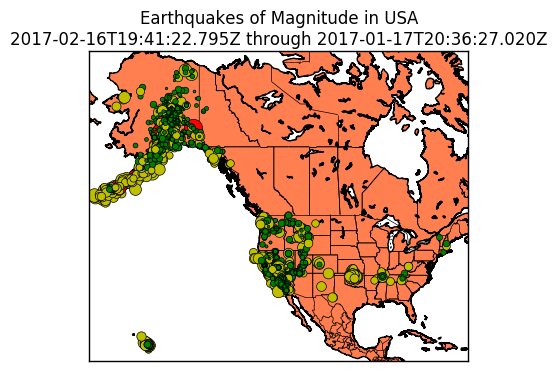

In [192]:
"""USA territories"""
map_mag(us, -172, 15, -65.25, 71,'USA')

<p> It seems that majority of earthquakes are concentrated in the West Coast of the United States, South of Alaska, and some in Nevada and Hawaii area. Why is this so? In the previous part "Earthquakse in the World", we discussed that roughly 90 percent of all earthquakes strike along the Ring of Fire, so does United States. The globel map above shows the magnitude of each earthquakes occured in the USA. There are 3 different catagories distingished by colors green, yellow, and red. Green color dots are for small earthquakes (magnitude less than 2), yellow color dots are for moderate earthquakes (magnitude less than 4), and red color dots are for significant earthquakes (magnitude greater than 4).</p>

<h2>Magnitude Statistics</h2>
<h3>What are some basic statistics (mas, min, average etc) for the magnitudes of the dataset?</h3>
<h3>Magnitude is a quantitative measure of the size of the earthquake at its source. The higher the magnitude the stronger the earthquake is. We divided the magnitude into 3 levels, small, moderate, and significant. Which magnitude strength appears the most often?</h3>
<h3>Which magnitude strength occur the most frequently in each states?</h3>

In [22]:
minimum = us["mag"].min()
maximum = us["mag"].max()
average = us["mag"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', -0.91000000000000003)
('Maximum:', 5.2999999999999998)
('Mean', 1.2374354862224841)


<p>The minimum magnitude in this dataset is -0.91. The maximum magnitude is 5.30. Average is 1.24 which means small earthquakes occurred the most frequently. Is this true for every states?</p>

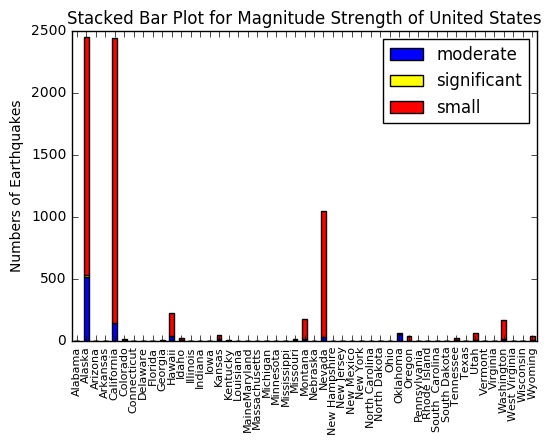

In [191]:
s = list()
m = list()
l = list()
for state in states:
    state_name = get_stat(state)
    co = get_co_data(state_name)
    vals = co['small'] #significant count value
    s.append(vals)
    valm = co['moderate'] 
    m.append(valm)
    vall = co['significant']
    l.append(vall)
sb = pd.DataFrame({'small':s, 'moderate':m, 'significant':l})
sb.plot(kind='bar', stacked=True, color = ['blue','yellow','red'])
plt.ylabel('Numbers of Earthquakes')
plt.title('Stacked Bar Plot for Magnitude Strength of United States')
plt.xticks(np.arange(len(states)), states, rotation = 90,size = 8)

plt.show()

<i>This is a stacked bar plot for the magnitude strength. However, let's break down the y-axis to visualize the data more clearly.</i>

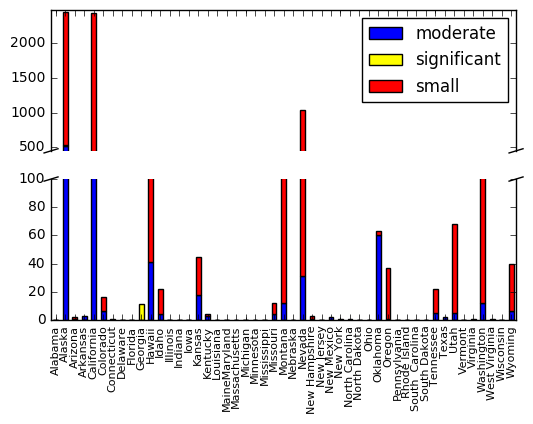

In [25]:
s = list()
m = list()
l = list()
for state in states:
    state_name = get_stat(state)
    co = get_co_data(state_name)
    vals = co['small'] #significant count value
    s.append(vals)
    valm = co['moderate'] 
    m.append(valm)
    vall = co['significant']
    l.append(vall)
df = pd.DataFrame({'small':s, 'moderate':m, 'significant':l})
f, axis = plt.subplots(2, 1, sharex=True)
df.plot(kind='bar', ax=axis[0],stacked=True, color = ['blue','yellow','red'])
df.plot(kind='bar', ax=axis[1],stacked=True, color = ['blue','yellow','red'])
plt.xticks(np.arange(len(states)), states, rotation = 90,size = 8)

axis[0].set_ylim(450, 2480)
axis[1].set_ylim(0, 100)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
plt.show()

<p>The stacked bar plot above shows the distribution of the magnitude strength for each states in the USA. We set the small earthquakes (red color) with magnitudes less than 2, moderate earthquakes (blue color) with magnitudes less than 4, and significant earthquakes (yellow color) with magnitudes greater than 4. If we look at magnitude strength by ratio, most of the states have the highest ratio on small earthquakes and the lowest ratio on significant earthquakes. However, Georgia has the highest ratio for significant earthquakes Oklahoma has the highest ratio for moderate earthquakes.</p>

In [21]:
gr = get_stat('Georgia')
grv = get_co_data(gr)
print grv
print ratio(gr)
ok = get_stat('Oklahoma')
okv = get_co_data(ok)
print okv
print ratio(ok)

Counter({'significant': 11})
[100.0]
Counter({'moderate': 60, 'small': 3})
[4.761904761904762, 95.23809523809523]


<p>The function (above) shows that Georgia has 100% significant earthquakes, and Oklahoma has 95% for the moderate earthquakes. However, the dataset for Georgia and Oklahoma are too small that if we want a further analysis, we will have to include more dataset for it to be unbiased.</p>

<h2>What is the top 2 states in the USA that has the most earthquakes? </h2>

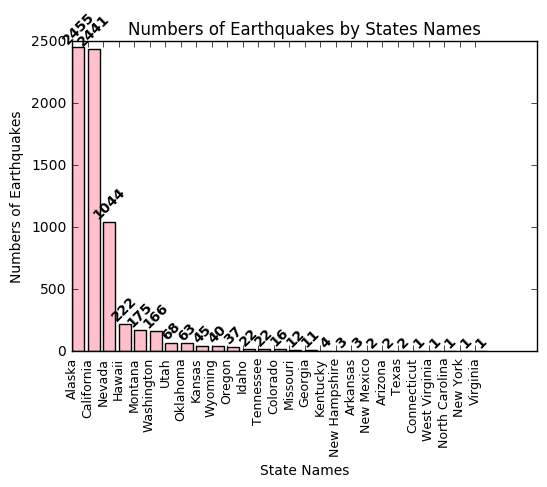

In [190]:
c = us['state'].value_counts()
x = c.values
y = c.index
l = np.arange(len(c))

fig,ax = plt.subplots()
rects = ax.patches
plt.bar(l, x, color = 'pink')
plt.xticks(l, y, size = 9,rotation = 90)
plt.ylabel('Numbers of Earthquakes')
plt.xlabel('State Names')
plt.title('Numbers of Earthquakes by States Names')
labels = x
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',fontweight='bold',rotation = 45)
plt.show()

<p>This is a histogram with numbers of earthquakes by state names. The numbers on top of each bar shows the exact amount earthquakes occured in that state. Most of the earthquakes occurs in Alaska and California, which has occured 2455 and 2441 times respectively during the month.
</p>

<h2>Alaska vs. California</h2>
<h3>What is a rough geographical distribution of the dataset for Alaska and California? Are some areas more "cluttered" or concentrated than others?</h3>
<h3>Is there any findings by comparing their magnitude strength?</h3>
<h3>How about comparing their magnitude strength ratio?</h3>

In [193]:
ak = get_stat('Alaska')
ca = get_stat('California')

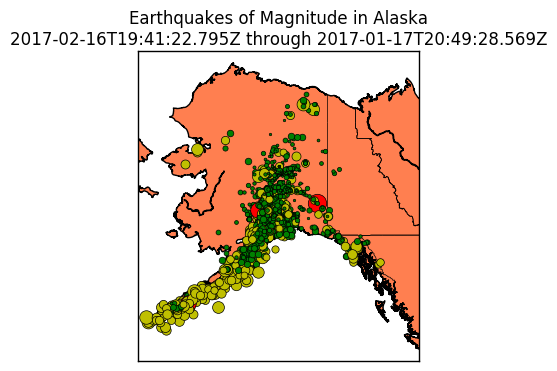

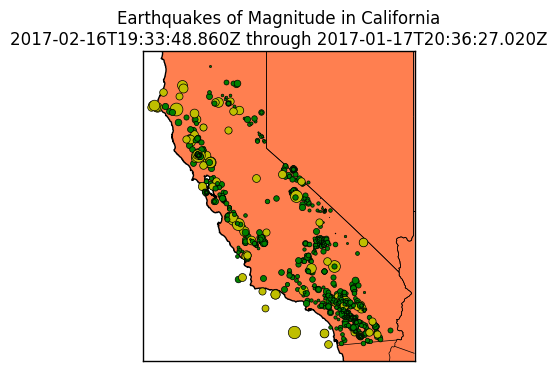

In [194]:
"""Alaska"""
map_mag(ak, -172, 48, -126, 72, 'Alaska')
"""California"""
map_mag(ca, -125, 32, -114, 42, 'California')

<p>The earthquakes in Alaska seems to be more concentrated than the earthquakes in California that are spread out along the coast and along the east side of California. How about their magnitude?</p>

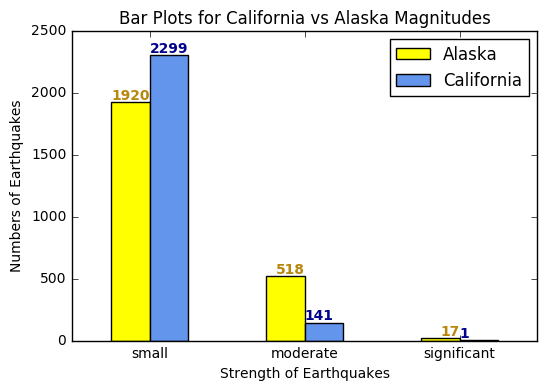

In [195]:
akv = get_co_data(ak).values()
cav = get_co_data(ca).values()
twobar = pd.DataFrame({'Alaska':akv, 'California':cav})
twobar.plot(kind='bar',color = ['yellow','cornflowerblue'])
ind = np.arange(3)
plt.xticks(range(3),get_co_data(ak).keys(),rotation = 0)
plt.ylabel('Numbers of Earthquakes')
plt.xlabel('Strength of Earthquakes')
plt.title('Bar Plots for California vs Alaska Magnitudes')
for a,b in zip(ind, akv): 
    plt.text(a, b, str(b),fontweight='bold',va='bottom',ha='right',color = 'darkgoldenrod')
for a,b in zip(ind, cav): 
    plt.text(a, b, str(b),fontweight='bold',va='bottom',ha='left',color = 'darkblue')

plt.show()

<p>Comparing the barplots of magnitude strength for California and Alaska, we can see that the most earthquakes for both states are small earthquakes which has magnitude that are less than 2. However, Alaska has 379 less small earthquakes than the numbers of small earthquakes in California, but Alaska has 377 and 16 more moderate and significant earthquakes than the earthquakes in California. What does that mean? Let's look at their ratio.</p>

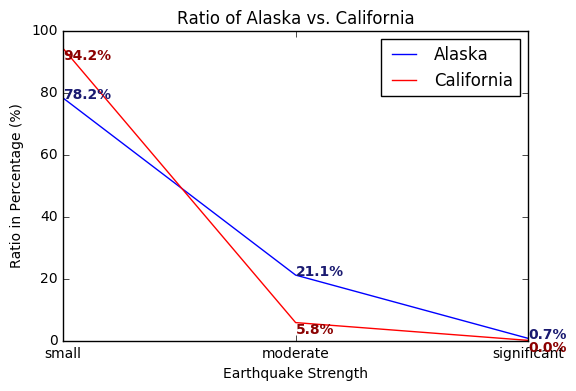

In [196]:
rak = ratio(ak)
rca = ratio(ca)
ind = range(len(rak))
co = get_co_data(ak)
plt.plot(rak,'blue',label = 'Alaska')
plt.plot(rca,'red',label = 'California')
plt.ylabel('Ratio in Percentage (%)')
plt.xlabel('Earthquake Strength')
plt.title('Ratio of Alaska vs. California')
plt.xticks(range(3), co.keys())

for a,b in zip(ind, rak): 
    plt.text(a, b, str(round(b,1)) + '%',fontweight='bold',color = 'midnightblue')
for a,b in zip(ind, rca): 
    plt.text(a, b, str(round(b,1)) + '%',fontweight='bold',va='top', color = 'darkred')
plt.legend(loc = 'upper right')

plt.show()

I divided each values by its total numbers of earthquakes, and then times 100 to get the percentage. Around 22% more of the earthquakes in Alaska are moderate or significant earthquakes, comparing to California's earthquakes. Alaska tends to have more moderate and significant earthquakes than California.

<h2>Is there any correlation between depth of the earthquake and magnitude of the earthquake?</h2>

<p>In the previous part, we discussed that earthquakes with magnitudes 5.5 to 6.5 does not have an relationship with depth of the earthquake. However, we want to test it with a different dataset which include magnitudes range from -0.91 to 5.30. </p>

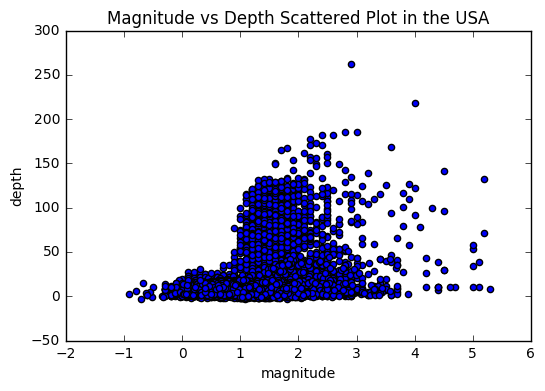

In [21]:
plt.scatter(us['mag'],us['depth'])
plt.ylabel('depth')
plt.xlabel('magnitude')
plt.title('Magnitude vs Depth Scattered Plot in the USA')
plt.show()

<p>This plot tells me that earthquakes with magnitudes roughly 0 to 5.3 can be found in a range of depths, from 0 meters to around 270 meters. There seems to have correlation for the earthquakes with small magnitude. As the magnitude gets larger, depth range gets larger. Does that means there is a correlation between the two? We get a correlation coefficient of 0.33 which indicate a weak positive linear relationship, so there is a weak correlation between depth of the earthquake and magnitude of the earthquake. </p>

In [20]:
df = us[['mag','depth']]
df.corr()

,mag,depth
mag,1.000000,0.327762
depth,0.327762,1.000000


<h2>Conclusion</h2>
<p>The majority of earthquakes in the USA are concentrated in the West Coast of the United States, South of Alaska, and some in Nevada and Hawaii area. Most of the earthquakes in each states has the highest ratio on small earthquakes and lowest ratio on significant earthquakes. Alaska and California are the two states that have the most earthquakes. By comparing Alaska with California, we found that Alaska tends to have more moderate and significant earthquakes than California. By comparing depth of the earthquake to the magnitude of the earthquake, we found that there is a weak correlation between depth of the earthquake and magnitude of the earthquake.</p>